Computação simbólica
====================

SymPy
-----

Nesta seção, apresentamos algumas funcionalidades básicas da biblioteca SymPy (SYMbolic Python). Em contraste com a computação numérica (envolvendo números), no cálculo simbólico estamos processando e transformando variáveis genéricas.

A página inicial do SymPy (<http://sympy.org/>) fornece a documentação completa (e atualizada) para esta biblioteca.

O cálculo simbólico é muito lento em comparação com as operações em ponto flutuante (veja, por exemplo e, assim, geralmente não muito adequada para simulação direta. No entanto, é uma ferramenta poderosa no suporte à preparação do código e trabalho simbólico. Ocasionalmente, usamos operações simbólicas em simulações para elaborar o código numérico mais eficiente, antes que seja executado.

### Saída

Antes de começarmos a usar o Sympy, chamaremos `init_printing`. Isto diz ao sympy para mostrar expressões em um formato melhor.

In [2]:
import sympy
sympy.init_printing()

### Símbolos

Antes de começarmos a executar qualquer operação simbólica, precisamos criar variáveis simbólicas usando a função `Symbol` do Sympy:

In [3]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [4]:
y = Symbol('y')
2 * x - x

In [5]:
x + y + x + 10*y

In [6]:
y + x - y + 10

Podemos abreviar a criação de múltiplas variáveis simbólicas usando a função `symbols`. Por exemplo, para criar as variáveis simbólicas `x`, `y` e `z`, podemos usar

In [7]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

Uma vez que terminarmos a manipulação dos termos, às vezes desejamos inserir números para as variáveis. Isso pode ser feito usando o método `subs`.

In [8]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y

In [9]:
x + 2*y.subs(x, 10)

In [10]:
(x + 2*y).subs(x, 10).subs(y, 3)

In [11]:
(x + 2*y).subs({x:10, y:3})

Também podemos substituir uma variável simbólica por outra, como neste exemplo, em que `y` é substituído por `x` antes de substituirmos `x` pelo número `2`.

In [12]:
termo = 3*x + y**2
termo

In [13]:
termo.subs(x, y)

In [14]:
termo.subs(x, y).subs(y, 2)

A partir deste ponto, alguns fragmentos de código e exemplos que apresentamos assumirão que os símbolos necessários já foram definidos. Se você tentar um exemplo e o SymPy der uma mensagem como `NameError: name 'x' is not defined`, é provavelmente porque você precisa definir o símbolo usando um dos métodos acima.

### isympy

O executável `isympy` é um _wrapper_ em torno do ipython que cria as variáveis simbólicas (reais) `x`, `y` e `z`, as variáveis inteiras simbólicas `k`, `m` e `n`, e as variáveis de função simbólica `f`, `g` e `h`, e importa todos os objetos do Sympy.

Isto é conveniente para descobrir novos recursos ou experimentar de forma interativa

   $> isympy
    Python 2.6.5 console for SymPy 0.6.7

    These commands were executed:
    >>> from __future__ import division
    >>> from sympy import *
    >>> x, y, z = symbols('xyz')
    >>> k, m, n = symbols('kmn', integer=True)
    >>> f, g, h = map(Function, 'fgh')

    Documentation can be found at http://sympy.org/

    In [1]: 

### Tipos numéricos

O SymPy tem os tipos numéricos `Rational` e `RealNumber`. A classe `Rational` representa um número racional como um par de dois inteiros: o numerador e o denominador, então `Rational (1,2)` representa `1/2`, `Rational(5,2)` representa `5/2`, e assim por diante.

In [15]:
from sympy import Rational

In [16]:
a = Rational(1, 10)
a

In [17]:
b = Rational(45, 67)
b

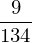

In [18]:
a * b

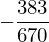

In [19]:
a - b

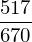

In [20]:
a + b

Note que a classe `Rational` funciona com expressões racionais *exatas*. Isso contrasta com o tipo de dado `float` padrão do Python, o qual usa a representação em ponto flutuante para 
*aproximar* números racionais.

Podemos converter o tipo `sympy.Rational` em uma variável de ponto flutuante no Python usando `float` ou o método `evalf` do objeto `Rational`. O método `evalf` pode levar um argumento que especifica quantos dígitos devem ser calculados para a aproximação de ponto flutuante (nem todos podem ser usados pelo tipo de ponto flutuante do Python, evidentemente).

In [21]:
c = Rational(2, 3)
c

In [22]:
float(c)

In [23]:
c.evalf()

In [24]:
c.evalf(50)

### Diferenciação e Integração

O SymPy é capaz de executar diferenciação e integração de muitas funções:

In [25]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

In [26]:
diff(sin(x), y)

In [27]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x)

In [28]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

In [29]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)

In [30]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)

In [31]:
diff(exp(x), x)

In [32]:
diff(exp(-x ** 2 / 2), x)

A função SymPy `diff()` usa no mínimo dois argumentos: a função a ser diferenciada e a variável em relação à qual a diferenciação é realizada. Derivadas de ordem superior podem ser calculadas pela especificação de variáveis adicionais, ou pela adição de um argumento inteiro opcional:

In [33]:
diff(3*x**4, x)

In [34]:
diff(3*x**4, x, x, x)

In [35]:
diff(3*x**4, x, 3)

In [36]:
diff(3*x**4*y**7, x, 2, y, 2)

In [37]:
diff(diff(3*x**4*y**7, x, x), y, y)

Às vezes, o SymPy pode retornar um resultado de uma forma pouco familiar. Se, por exemplo, você desejar usar o SymPy para verificar se você diferenciou algo corretamente, uma técnica que pode ser útil é subtrair o resultado do SymPy do seu resultado e verificar se a resposta é zero.

Tomando o exemplo simples de uma função de base radial multiquádrica, $ \phi(r) = \sqrt{r^2 + \sigma^2} $ com $ r = \sqrt{x^2 + y^2} $ e $ \sigma $ uma constante, podemos verificar se a primeira derivada em $ x $ é $ \frac{\partial \phi}{\partial x} = \frac{x}{\sqrt{r^2 + \sigma^ 2}} $.

Neste exemplo, primeiro pedimos que o SymPy imprima a derivada. Veja que ela é impressa de forma diferente da nossa derivada de teste, mas a subtração verifica que eles são idênticas:

In [38]:
r = sqrt(x**2 + y**2)
sigma = Symbol('σ')
def phi(x,y,sigma):
    return sqrt(x**2 + y**2 + sigma**2)

minha_dfdx= x/sqrt(r**2 + sigma**2)
print(diff(phi(x, y, sigma), x))

x/sqrt(x**2 + y**2 + σ**2)


In [39]:
print(minha_dfdx - diff(phi(x, y, sigma), x))

0


Aqui é trivial dizer que as expressões são idênticas sem a ajuda do SymPy, mas, em exemplos mais complicados, pode haver muitos outros termos, tornando-se cada vez mais difícil, demorado e propenso a erros tentar reorganizar nossa derivada de teste e a resposta do SymPy na mesma forma. São nesses casos que esta técnica de subtração é de maior utilidade. A integração usa uma sintaxe semelhante. Para o caso indefinido, especifique a função e a variável em relação à qual a integração é realizada:

In [40]:
from sympy import integrate
integrate(x**2, x)

In [41]:
integrate(x**2, y)

In [42]:
integrate(sin(x), y)

In [43]:
integrate(sin(x), x)

In [44]:
integrate(-x*exp(-x**2/2), x)

Podemos calcular integrais definidas fornecendo `integrate()` com uma tupla contendo a variável de interesse, os limites inferior e superior. Se várias variáveis forem especificadas, a integração múltipla é realizada. Quando o SymPy retorna um resultado na classe `Rational`, é possível avaliá-lo em uma representação de ponto flutuante com qualquer precisão desejada.

In [45]:
integrate(x*2, (x, 0, 1))

In [46]:
integrate(x**2, x)

In [47]:
integrate(x**2, x, x)

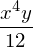

In [48]:
integrate(x**2, x, x, y)

In [49]:
integrate(x**2, (x, 0, 2))

In [50]:
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))

In [51]:
float(integrate(x**2, (x, 0, 2)))

In [52]:
type(integrate(x**2, (x, 0, 2)))

sympy.core.numbers.Rational

In [53]:
resultado_racional=integrate(x**2, (x, 0, 2))
resultado_racional.evalf()

In [54]:
resultado_racional.evalf(50)

### Equações diferenciais ordinárias

O SymPy tem suporte incorporado para resolver vários tipos de equações diferenciais ordinárias através do comando `dsolve`. Precisamos configurar a EDO e passá-la como o primeiro argumento, `eq`. O segundo argumento é a função `f(x)` a resolver. Um terceiro argumento opcional, `hint`, influencia o método que `dsolve` usa: alguns métodos são mais adequados a certas classes de EDOs ou expressarão a solução de forma mais simples do que outros. 

Para configurar o solucionador de EDO, precisamos de uma maneira de se referir à função incógnita a qual estamos resolvendo, bem como suas derivadas. As classes `Function` e ` Derivative` facilitam isso:

In [55]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

Observe como `dsolve` introduziu uma constante de integração, `C1`. Ela introduzirá tantas constantes quantas forem necessárias, e todas serão chamados `Cn`, onde `n` é um número inteiro. Observe também que o primeiro argumento para `dsolve` é considerado igual a zero, a menos que usemos a função `Eq () `para especificar o contrário:

In [56]:
dsolve(y_ + 5*y(x), y(x))

In [57]:
dsolve(Eq(y_ + 5*y(x), 0), y(x))

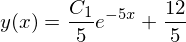

In [58]:
dsolve(Eq(y_ + 5*y(x), 12), y(x))

Os resultados de `dsolve` são uma instância da classe `Equality`. Isto tem consequências quando desejamos avaliar numericamente a função e usar o resultado em outro lugar (e.g. se quisermos plotar *y*(*x*) por *x*), porque mesmo depois de usar `subs ()` e `evalf () `, ainda temos uma `Equality`, não qualquer tipo de escalar. A maneira de avaliar a função para um número é através do atributo `rhs` da `Equality`. Note que, aqui, usamos `z` para armazenar a `Equality` retornada por `dsolve`, ainda que seja uma expressão para uma função chamada `y(x)`, enfatizando a distinção entre `Equality` e os dados que ela contém.

In [59]:
z = dsolve(y_ + 5*y(x), y(x))
z

In [60]:
type(z)

sympy.core.relational.Equality

In [61]:
z.rhs

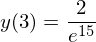

In [62]:
C1=Symbol('C1')
y3 = z.subs({C1:2, x:3})
y3

In [63]:
y3.evalf(10)

In [64]:
y3.rhs

In [65]:
y3.evalf(10)

In [66]:
y3.rhs

In [67]:
y3.rhs.evalf(10)

In [68]:
z.rhs.subs({C1:2, x:4}).evalf(10)

In [69]:
z.rhs.subs({C1:2, x:5}).evalf(10)

In [70]:
type(z.rhs.subs({C1:2, x:5}).evalf(10))

sympy.core.numbers.Float

Às vezes, `dsolve` pode retornar uma solução muito geral. Um exemplo é quando existe a possibilidade de que alguns coeficientes sejam complexos. Se soubermos que, por exemplo, eles são sempre reais e positivos, podemos passar esta informação para 'dsolve' e evitar que a solução se torne desnecessariamente complicada:

In [71]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

In [72]:
a=Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

### Expansões em série e plotagens

É possível expandir muitas expressões do SymPy em série de Taylor. O método `series` torna isso direto. No mínimo, devemos especificar a expressão e a variável a ser expandida. Opcionalmente, também podemos especificar o ponto em torno do qual expandir, o número máximo de termos e a direção da expansão (tente `help(Basic.series)` para mais informações).

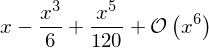

In [73]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

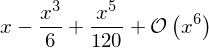

In [74]:
series(sin(x), x, 0)

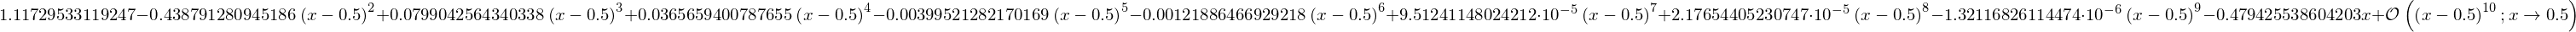

In [75]:
cos(x).series(x, 0.5, 10)

Em alguns casos, especialmente para avaliação numérica e  plotagem dos resultados, é necessário remover o termo final `O (n)`:

In [76]:
cos(x).series(x, 0.5, 10).removeO()

O SymPy fornece duas funções de plotagem, `plot()`, do módulo `sympy.plotting`, e` plot` de `sympy.mpmath.visualization`. No momento da escrita, essas funções careciam de algumas capacidades de  `plotagem`, o que significa que não são adequadas para a maioria de nossas necessidades. Ainda assim, caso você deseje utilizá-las, a função `help ()` delas é útil. 

Para a maioria dos nossos propósitos, Matplotlib deve ser a ferramenta de plotagem a ser escolhida. Os detalhes estão no Capítulo 15. Aqui, fornecemos apenas um exemplo de como plotar os resultados de uma computação SymPy.

In [78]:
%matplotlib inline

In [79]:
from sympy import sin,series,Symbol
import pylab
x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))

pylab.figure()

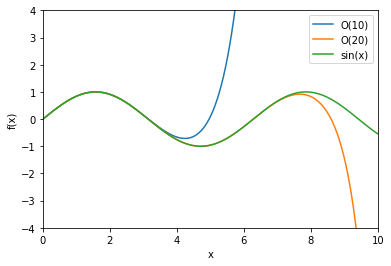

In [80]:
pylab.plot(xx, y10, label='O(10)')
pylab.plot(xx, y20, label='O(20)')
pylab.plot(xx, y, label='sin(x)')

pylab.axis([0, 10, -4, 4])
pylab.xlabel('x')
pylab.ylabel('f(x)')

pylab.legend()

### Equações lineares e inversão de matrizes

O SymPy possui uma classe `Matrix` e funções associadas que permitem a solução simbólica de sistemas de equações lineares (e, claro, podemos obter respostas numéricas com `subs()` e `evalf()`). Considerararemos o exemplo do seguinte par de equações lineares simples:

$$ 
\begin{aligned}
3x + 7y & = 12z \\
4x - 2y & = 5z 
\end {aligned} 
$$

Podemos escrever este sistema na forma $ \textbf{A} \textbf{x} = \textbf{b} $ (multiplique $ \textbf{A} $ por $ \textbf{x} $ caso queira verificar se as equações originais são recuperadas), onde

$$ A = 
\left(
\begin{array}{cc}
3 & 7 \\
4 & -2 
\end{array} 
\right), 
\qquad
\textbf{x} = 
\left(
\begin{array}{c}
x \\
y 
\end{array} 
\right), 
\qquad
\textbf{b} = 
\left(
\begin{array}{c}
12z \\
5z 
\end{array} 
\right). $$

Aqui, incluímos um símbolo, $ z $, no lado direito para demonstrar que os símbolos serão propagados na solução. Em muitos casos, teríamos $ z = 1 $, mas ainda pode haver benefício ao se usar SymPy como um solucionador numérico, mesmo quando a solução não contenha símbolos devido à sua capacidade de retornar frações exatas em vez de `floats` aproximados.

Uma estratégia para resolver o sistema para $ \textbf{x} $ é inverter a matriz $ \textbf{A} $ e pré-multiplicar, i.e. $ \textbf{A}^{-1} \textbf{A} \textbf{x} = \textbf{x} = \textbf{A}^{-1} \textbf{b} $. A classe `Matrix` do SymPy possui um método `inv()` que nos permite encontrar a inversa e `*` realiza a multiplicação da matriz para nós, quando apropriado:

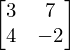

In [81]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

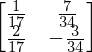

In [82]:
A.inv()

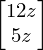

In [83]:
b = Matrix(( 12*z,5*z  ))
b

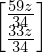

In [84]:
x = A.inv()*b
x

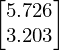

In [85]:
x.subs({z:3.3}).evalf(4)

In [86]:
type(x)

sympy.matrices.dense.MutableDenseMatrix

Um método alternativo para resolver o mesmo problema é construir o sistema como uma matriz aumentada. Essa é a forma obtida dispondo juntas as colunas (no nosso exemplo) de $ \textbf{A} $ e o vetor $ \textbf{b} $. A matriz aumentada é [1]:

$$ 
\textbf{A} | \textbf{b} ) = 
\left( 
\begin{array}{cc|c}
3 & 7 & 12z \\
4 & -2 & 5z 
\end{array} 
\right), 
$$ 

e, como antes, construímos isto como um objeto SymPy `Matrix`, mas, neste caso, passamos para a função `solve_linear_system ()`:

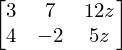

In [87]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

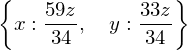

In [88]:
sol = solve_linear_system(system,x,y)
sol

In [89]:
type(sol)

dict

In [90]:
for k in sol.keys():
    print(k,'=',sol[k].subs({z:3.3}).evalf(4))

x = 5.726
y = 3.203


Uma terceira opção é o método `solve()`, cujos argumentos incluem as equações simbólicas individuais, em vez de qualquer matriz. Como `dsolve()`, `solve()` espera ou expressões que ela assumira como iguais a zero, ou objetos `Equality`, que podemos criar convenientemente com `Eq()`:

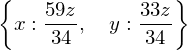

In [91]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

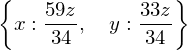

In [92]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

Para obter mais informações, consulte `help(solve)` e `help(solve_linear_system)`.

### Equações não-lineares

Vamos resolver uma equação simples como $ x = x^2 $. Existem duas soluções óbvias: $ x = 0 $ e $ x = 1 $. Como podemos pedir ao Sympy para calcular isso para nós?

In [93]:
import sympy
x, y, z = sympy.symbols('x, y, z')        # cria alguns simbolos
eq = x - x ** 2                           # define a equacao

In [94]:
sympy.solve(eq, x)                        # resolve eq = 0

A função `solve()` expressão que deve ser resolvida com o zero isolado. Para o nosso exemplo, reescrevemos $ x = x^2 $ como $ x - x^2 = $ e então a passamos para a função `solve()`.

Vamos repetir o mesmo para a equação $ x = x^3 $ e resolver

In [95]:
eq = x - x ** 3                           # define a equacao
sympy.solve(eq, x)                        # resolve eq = 0

### Saída: interface com LaTeX e impressão elegante

Como é o caso de muitos sistemas algébricos computacionais, o SymPy tem a capacidade de formatar sua saída como código LaTeX  para facilitar a inclusão em documentos. 

No início deste capítulo, chamamos:

``` python
sympy.init_printing()
```

O Sympy detectou que estava em Jupyter e habilitou a saída em LaTeX. O Jupyter Notebook suporta (um pouco de) LaTeX e isso é o que nos dá a saída acima elegantemente formatada. Também podemos ver a saída em texto simples a partir do Sympy, e o código LaTeX puro que ele cria:

In [96]:
print(series(1/(x+y), y, 0, 3))

y**2/x**3 - y/x**2 + 1/x + O(y**3)


In [97]:
print(latex(series(1/(x+y), y, 0, 3)))

\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + \frac{1}{x} + \mathcal{O}\left(y^{3}\right)


In [98]:
print(latex(series(1/(x+y), y, 0, 3), mode='inline'))

$\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + 1 / x + \mathcal{O}\left(y^{3}\right)$


Esteja ciente de que em seu modo padrão, o código de saída produzido por `latex()` requer o pacote `amsmath`, a ser carregado através do comando `\usepackage amsmath}` no preâmbulo do documento. 

O SymPy também suporta uma rotina de saída "pretty print" (`pprint()`), que produz saída de texto com melhor formatação do que a rotina de impressão padrão, conforme ilustrado abaixo. Observe os recursos de notação, tais como subíndices para elementos de um `array` cujos nomes são da forma `T_n`, a constante italicizada $ e $, pontos centralizados verticalmente para a multiplicação, bordas de matrizes e frações.

<img src="sympy/sympy2.png" alt="Saída formatada de pprint()." style="width:80.0%" />

Finalmente, o SymPy oferece `preview()`, que exibe a saída renderizada na tela (verifique `help(preview)` para obter detalhes).

### Geração automática de código em C 

Um ponto forte de muitas bibliotecas simbólicas é que elas podem converter as expressões simbólicas em código C (ou outro código) que podem ser posteriormente compilaaos para execução em alta velocidade. Aqui está um exemplo que demonstra isso:

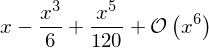

In [99]:
from sympy import *                                                                                    
from sympy.utilities.codegen import codegen                                                                            
x = Symbol('x')                                                                                                          
sin(x).series(x, 0, 6)

In [100]:
print(codegen(("taylor_sine",sin(x).series(x,0,6)), language='C')[0][1])

/******************************************************************************
 *                       Code generated with sympy 1.0                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "taylor_sine.h"
#include <math.h>

double taylor_sine(double x) {

   double taylor_sine_result;
   taylor_sine_result = x - 1.0L/6.0L*pow(x, 3) + (1.0L/120.0L)*pow(x, 5) + O(x**6);
   return taylor_sine_result;

}



Ferramentas relacionadas
-------------

Vale a pena notar que a iniciativa SAGE <http://www.sagemath.org/> está tentando "criar uma alternativa de fonte aberta livre e viável para Magma, Maple, Mathematica e Matlab" e inclui a biblioteca SymPy entre muitos outros. Suas capacidades simbólicas são mais poderosas do que as de SymPy e SAGE, mas os recursos da SymPy já abordarão muitas das necessidades decorrentes de ciência e engenharia. SAGE inclui o sistema de álgebra do computador Maxima, que também está disponível de forma autônoma em <http://maxima.sourceforge.net/>.